<h1> 1ª Lista de Exercícios </h1>

<h2> Cinética Química </h2> 

Neste exercícios vamos construir modelos, resolvê-los analitica e numéricamente, e discutir a estabilidade dos seus equilíbrios.

**I. Considere a equação de produção e decaimento introduzida acima. Em biologia celular, é comum a produção por tempo limitado, de uma molécular como resposta a um estimulo nervoso ou hormonal.**

Modifique o modelo de Produção e decaimento de forma que $I$ seja positivo apenas entre os tempos $t=4$ e $t=10$. 
Dica: Use a função de Heaviside mostrada abaixo.

Como você escreveria o modelo resultante em notação matemática?

Resolva o modelo e discuta o seu equilíbrio.

Verifique se o equilíbrio do modelo depende da sua condição inicial, x(0)

Seja o modelo expresso pela EDO abaixo:
$$C'(t)= I - \gamma C(t)$$

onde I representa a produção e  $\gamma$ o decaimento. Se há produção ocorrer apenas entre t = 4 e t = 10, podemos introduzir a seguinte equação no modelo:
$$C'(t)= I U(t) - \gamma C(t)$$

Sendo
$$U(t) = 
\begin{cases} 
0, \text{ se } t \geq 4 \\
1, \text{ se } 4  < t <  10\\
0, \text{ se } t \leq 10 
\end{cases}
$$

Graficamente, podemos visualizar esse resultado como:


In [1]:
def c(t,x):
    I = heaviside(t-4) - heaviside(t-10)
    return [I - 0.3*x[0]]

def fun(t,x):
    I = heaviside(t-4)-heaviside(t-10)
    return [I - 0.4*x[0]]
T = ode_solver()
T.algorithm = "rk8pd"
T.function = c
T.ode_solve(y_0=[1.5],t_span=[0,14], num_points=140)



In [33]:
i = 0
while i < len(T.solution):
    if T.solution[i][0] > 4:
        k = i
        print(k)
        break 
    i = i +1

# definindo o intervalo da solução de 0 a 4 
int04 = T.solution[:k]

# para  o intervalo de 4 a 10 
j = 0
while j < len(T.solution):
    if T.solution[j][0] > 10:
        s = j
        print(s)
        break 
    j = j +1

# definindo o intervalo da solução de 0 a 4 
int410 = T.solution[k:s]
#print(int410)
int10 = T.solution[s:]
print(int10[0][1][0])

40
101
2.7725800110878955


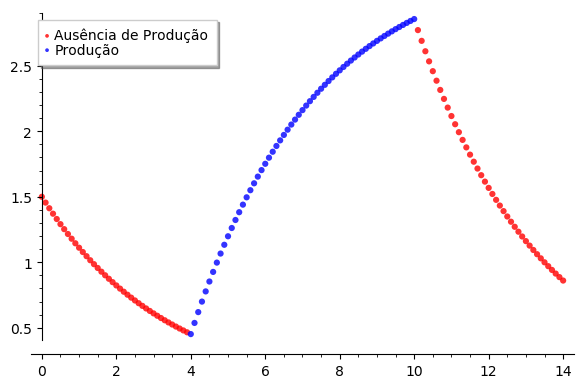

In [41]:
a=list_plot([(i[0],i[1][0]) for i in int04],color='red', pointsize=20, legend_label='Ausência de Produção', alpha=.8)
b=list_plot([(i[0],i[1][0]) for i in int410],color='blue', pointsize=20, legend_label='Produção', alpha=.8)
c = list_plot([(i[0],i[1][0]) for i in int10],color='red', pointsize=20, alpha=.8) 
a.legend()
b.legend()
show(a + b + c)

O equilíbrio nesse caso está relacionado ao comportamento dessa equação quando t > 10. 
Como nesse caso teremos apenas o decaimento $C'(t) = -\gamma C(t)$ a solução será $C(t) = C_0 e^{-\gamma t}$.Assim, quando $t -> \infty$, $C(t) -> 0$.

**II. Uma substância com meia-vida de um dia é produzida a uma taxa constante de $10μMh^{−1}$. Suponha que a sua concentração seja denotada por $C(t)$.**

Use uma equação diferencial para descrever a dinâmica deste processo. Usando o Sage encontre a solução deste modelo analíticamente.
Se um inibidor for aplicado em $t=0$, de forma que a substância não seja mais produzida. Encontre a solução $C(t)$ e a use para mostrar the $C(t)→0$ quando $t→∞$
Suponha agora que começando de $C(0)=C_0$, aplica-se uma droga que inibe o decaimento da substância completamente, sem afetar a sua taxa de produção. Mostre que a substância se acumulará a uma taxa linear $C(t)=C_0+kt$ e encontre o valor de $k$.

**Solução**

Suponha que esse modelo seja expresso por:
    $$C'(t)= I - \gamma C(t)$$
Sendo $I =10μMh^{−1}$ e $\gamma = 1/24$

Nesse caso a solução analítica desse modelo é:


In [43]:
var('t I g')
C = function('C')(t)
d = diff(C,t) == I - g*C
sol = desolve(d, C, ivar = t)
show(sol)

(_C + I*e^(g*t)/g)*e^(-g*t)

Como estamos trabalhando com uma variável dependete no tempo e lidando com a modelagem de um fenômeno real, devemos cosiderar 
que t> 0. Nesse sentido, se é aplicado um inibidor em t =0, temos que a EDO que descreve esse processo possui apenas um termo
associado ao seu decaimento. Nesse caso essa EDO é definida por: 
    $$C'(t) = -\gamma C(t)$$

Nesse caso a solução analítica desse modelo é expressa por:

In [44]:
var('t g')
C = function('C')(t)
d = diff(C,t) == -g*C
sol = desolve(d,C,ivar = t)
show(sol)

_C*e^(-g*t)

Calculando o limite dessa função podemos ver que independente do valor da constante C, se $t \rightarrow \infty$, então 
$C(t) \rightarrow 0 $. Podemos visualizar isso plotando um gráfico para o campo de direções dessa função. 


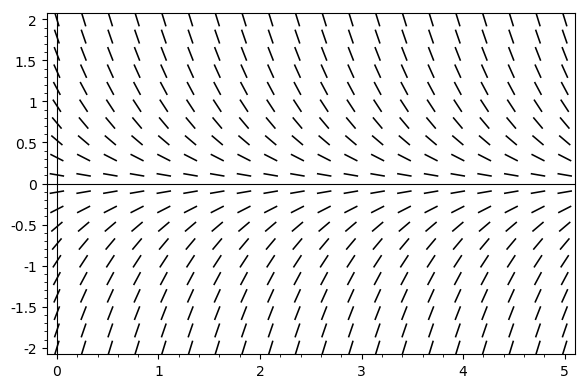

In [45]:
### Aprender a gerar o campo de direções para uma função de uma só variável 
t, C = var('t C')
g = 2 #pode ser interessante criar um objeto interativo para  o g
p = plot_slope_field(-g*C, (t,0,5), (C,-2,2))
show(p)

Considerando um inibidor no decaimento em t = 0, seguindo a mesma lógica do caso anterior a EDO seria descrito apenas por: 
    $$C'(t) = I$$
Resolvendo essa EDO analiticamente encontramos: 
    

In [46]:
var('t I')
C = function('C')(t)
d = diff(C,t) == I
sol = desolve(d,C, ivar = t)
show(sol)

I*t + _C

Veja acima que a solução dessa EDO é uma reta. O campo de direções dessa EDO pode ser representado por

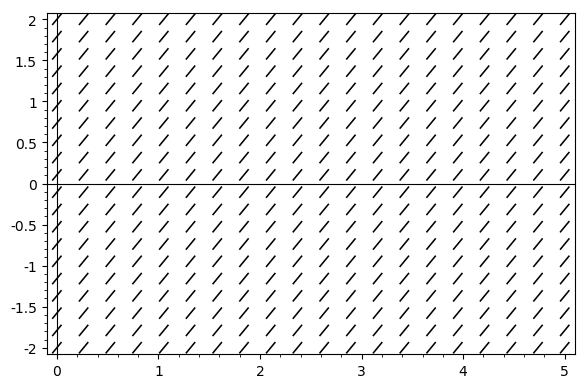

In [47]:
t, C = var('t C')
I = 1.5 #pode ser interessante criar um objeto interativo para  o g
p = plot_slope_field(I, (t,0,5), (C,-2,2))
show(p)

**III. Imagine dois tanques de reação $T$ e $U$, que se comunicam com fluxos $k_1=k_2$ A substância $A$ é introduzida no tanque $T$ a uma taxa constante $I$ e a substância $B$ é introduzida no tanque $U$ a um taxa constante $J$. A substância $B$ decai a uma taxa $\gamma_2$ apenas no tanque $T$ enquanto que a substância $A$ decai a uma taxa $\gamma_1$, apenas no tanque $U$.**

Escreva um sistema de equações diferenciais descrevendo a evolução temporal das duas substâncias em cada um dos Tanques:
   $$T' = I \cdot A + k_2\cdot U - k_1 \cdot T - \gamma_2 \cdot B $$
   $$ U' = J\cdot B + k_1 \cdot T - k_2 \cdot U - \gamma_1 A $$

Resolva o sistema analíticamente, usando o Sage. e discuta os equilíbrios e sua estabilidade.

**Solução**
Podemos representar o modelo acima pelo seguinte sistema de equações diferenciais ordinárias:

\begin{cases}
T_A = I - k_1 \cdot T_A + k_2 \cdot U_A \\
U_A = k_1\cdot T_A - \gamma_1 \cdot U_A - k_2\cdot U_A \\
T_B = k_2 \cdot U_B - (k_1 + \gamma_2)T_B\\
U_B = J - k_2\cdot U_B + k_1 \cdot T_B
\end{cases}

Sendo $T_A$, a substância $A$ no tanque $T$, $U_A$, a substância $A$ no tanque $U$, $T_B$ a substância $B$ no tanque $T$ e $U_B$ a substância $B$ no tanque $U$

Definindo o sistema no Sage e encontrando a sua solução analítica

In [51]:
# definindo o modelo no sage
var(' T_A T_B U_A U_B I J k_1 k_2 gamma_1 gamma_2 t')
T_A = function('T_A')(t)
U_A = function('U_A')(t)
T_B = function('T_B')(t)
U_B = function('U_B')(t)

dT_Adt =  I-k_1*T_A + k_2*U_A
dU_Adt =  k_1*T_A - gamma_1*T_A - k_2*U_A
dT_Bdt =  k_2*U_B - (k_1+gamma_2)*T_B
dU_Bdt =  J-k_2*U_B +k_1*T_B

sol = desolve_system([dT_Adt,dU_Adt,dT_Bdt,dU_Bdt],[T_A,U_A,T_B,U_B],ivar=t, ics=[0,1,1,1,1])
show(sol)

[T_A(t) == I/gamma_1,
 U_A(t) == -(I*gamma_1 - I*k_1)/(gamma_1*k_2),
 T_B(t) == J/gamma_2,
 U_B(t) == (J*gamma_2 + J*k_1)/(gamma_2*k_2)]

A solução numérica desse modelo pode ser expressa por: 
    

In [57]:
def tanques(t,y, params):
    T_A,U_A,T_B,U_B= y
    k_1,k_2,gamma_1,gamma_2,I,J = params
    return[I-k_1*T_A + k_2*U_A,k_1*T_A - gamma_1*T_A - k_2*U_A, k_2*U_B - (k_1+gamma_2)*T_B, J-k_2*U_B +k_1*T_B]

T = ode_solver()
T.algorithm = "rk8pd"
T.function = tanques
T.ode_solve(y_0=[7,7,7,7],t_span=[0,20],params=(1,1,1,1.3,1.8,1.8), num_points=100)

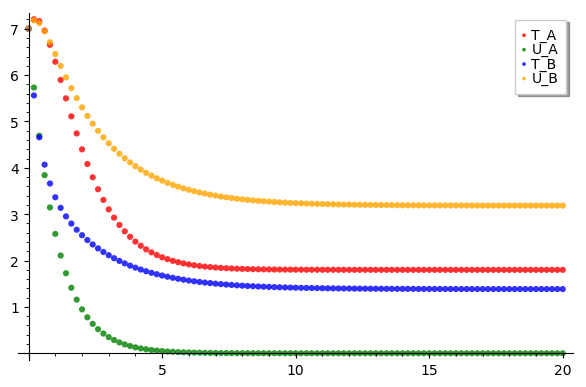

In [60]:
a=list_plot([(i[0],i[1][0]) for i in T.solution],color = 'red', pointsize=20, legend_label='T_A', alpha=.8)
b=list_plot([(i[0],i[1][1]) for i in T.solution],color = 'green',pointsize=20, legend_label='U_A', alpha=.8)
c=list_plot([(i[0],i[1][2]) for i in T.solution],color = 'blue', pointsize=20, legend_label='T_B', alpha=.8)
d=list_plot([(i[0],i[1][3]) for i in T.solution], color = 'orange', pointsize=20, legend_label='U_B', alpha=.8)
a.legend()
b.legend()
c.legend()
d.legend()
show(a+b+c+d)

Assumindo $I = sen(t)$

In [63]:
# definindo o modelo no sage
var(' T_A T_B U_A U_B J k_1 k_2 gamma_1 gamma_2 t')
T_A = function('T_A')(t)
U_A = function('U_A')(t)
T_B = function('T_B')(t)
U_B = function('U_B')(t)

dT_Adt =  sin(t) -k_1*T_A + k_2*U_A
dU_Adt =  k_1*T_A - gamma_1*T_A - k_2*U_A
dT_Bdt =  k_2*U_B - (k_1+gamma_2)*T_B
dU_Bdt =  J-k_2*U_B +k_1*T_B

sol = desolve_system([dT_Adt,dU_Adt,dT_Bdt,dU_Bdt],[T_A,U_A,T_B,U_B],ivar=t, ics=[0,1,1,1,1])
show(sol)

[T_A(t) == sin(t)/gamma_1,
 U_A(t) == -(gamma_1 - k_1)*sin(t)/(gamma_1*k_2),
 T_B(t) == J/gamma_2,
 U_B(t) == (J*gamma_2 + J*k_1)/(gamma_2*k_2)]

A solução numérica se torna:

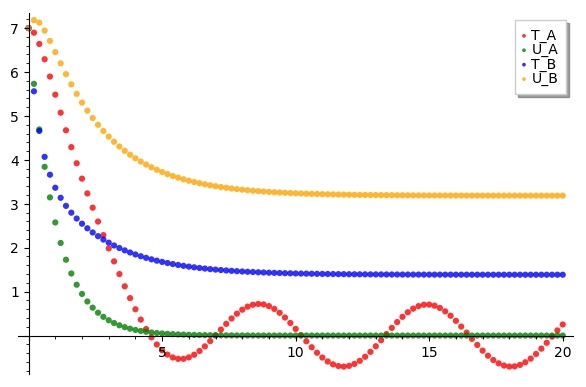

In [64]:
def tanques(t,y, params):
    T_A,U_A,T_B,U_B= y
    k_1,k_2,gamma_1,gamma_2,J = params
    return[sin(t)-k_1*T_A + k_2*U_A,k_1*T_A - gamma_1*T_A - k_2*U_A, k_2*U_B - (k_1+gamma_2)*T_B, J-k_2*U_B +k_1*T_B]

T = ode_solver()
T.algorithm = "rk8pd"
T.function = tanques
T.ode_solve(y_0=[7,7,7,7],t_span=[0,20],params=(1,1,1,1.3,1.8), num_points=100)
a=list_plot([(i[0],i[1][0]) for i in T.solution],color = 'red', pointsize=20, legend_label='T_A', alpha=.8)
b=list_plot([(i[0],i[1][1]) for i in T.solution],color = 'green',pointsize=20, legend_label='U_A', alpha=.8)
c=list_plot([(i[0],i[1][2]) for i in T.solution],color = 'blue', pointsize=20, legend_label='T_B', alpha=.8)
d=list_plot([(i[0],i[1][3]) for i in T.solution], color = 'orange', pointsize=20, legend_label='U_B', alpha=.8)
a.legend()
b.legend()
c.legend()
d.legend()
show(a+b+c+d)

<h2> Análise Dimensional e Adimensionalização </h2>

**IV. Considere o seguinte modelo de crescimento populacional: $dN/dt=rN$, onde $N(0)=N_0 > 0$ e $r > 0$. Neste modelo $r$ é a taxa de crescimento e $N_0$ é a população inicial. Lembre-se que a solução deste modelo é $N(t)=N_0 e^{rt}$.**

Re-escale este modelo em unidades da população inicial, ou seja, defina $y(t)=N(t)/N_0$. 

Qual a equação resultante e quais as condições iniciais correspondentes?
$$y'(t) = ry, $$ 
nesse caso $y(0) = \cfrac{N(0)}{N_0} = \cfrac{N_0}{N_0} = 1$

Quais as unidades de $r$?
$$ r = \cfrac{1}{T}$$

Qual o "tempo de duplicação" desta população? isto é o tempo $τ$ para o qual $y(τ)=yN_0$.

Não seria $y(τ)=2$?.Nesse caso, como $y(t) = e^{rt}$, teríamos que:
$$e^{rτ}  = 2 \implies rτ = ln(2) \implies τ = \cfrac{ln(2)}{r} $$

Mostre que é possivel definir um tempo adimensional $s$ tal que o modelo se transforme em $dy/ds=y$, $y(0)=1$.

**Solução**

Sabendo que
$$y'(t) = ry, $$
Fazendo $s = rt \implies ds = rdt = \cfrac{ds}{dt}= r$, temos que:
$$\cfrac{dy}{dt} = \cfrac{dy}{\cfrac{ds}{r}} = \cfrac{ds}{dy} r = ry \implies y'(s)  = y$$

Como vimos no 1º item $y(0) = 1$.

V - Considere a seguinte equação para o crescimento de uma única espécie de organismo:
$$\frac{dP}{dt}=\frac{v P}{K+P}-\mu P$$

Interprete o que estas equações estão dizendo
defina $x=P / Q$ e $s=t/\tau$ onde $Q$, $\tau$ são escalas a serem escolhidas. Converta a equação para uma forma adimensional em termos destas novas escalas.
Qual seria uma escolha razoável para $Q$? e para $\tau$?


**Solução:**

As dimensões das incógnitas da EDO são:
$v = [M]/[T], P = [M], K = [M], \mu = 1/[T]$


Adimensionalizando em relação a massa:
Seja $x = \cfrac{P}{K}$:

$$\cfrac{dx}{dt} = \cfrac{dP}{t} \cdot \cfrac{1}{K}$$

Substituindo $P = x \cdot K$:
$$\implies \cfrac{dx}{dt} = \cfrac{1}{K} \cdot \left( v \cdot \cfrac{xK}{(x+1)K} - \mu xk \right)$$
$$\implies \cfrac{dx}{dt} = \cfrac{v}{K} \cdot \cfrac{x}{x+1} - \mu x$$

Adimensionalizando agora em relação ao tempo:
Seja $s = t/(1/\mu) \implies 1 = \cfrac{dt}{ds} \cdot \cfrac{1}{1/\mu} \implies \cfrac{dt}{ds} = \cfrac{1}{\mu}$ 

Utilizando a regra da cadeia:
$$\cfrac{dx}{ds} = \cfrac{dx}{dt} \cdot \cfrac{dt}{ds}\implies \cfrac{dx}{ds} = \cfrac{dx}{dt} \cdot \cfrac{1}{\mu} $$

Portanto, 
$$\implies \cfrac{dx}{ds} = \left(\cfrac{v}{K} \cdot \cfrac{x}{x+1} - \mu x \right) \cdot \cfrac{1}{\mu}$$

$$\implies \cfrac{dx}{dt} = \cfrac{v}{k\mu} \cdot \cfrac{x}{x+1} - x $$

Seja $\alpha =  \cfrac{v}{k\mu}$, temos que esse modelo adimensionalizado pode ser expresso por:
$$\cfrac{dx}{ds} = \alpha \cfrac{x}{x+1} - x$$

VI. A dinâmica da lagarta do pinheiro pode ser descrita pelo modelo proposto por Ludwig, Jones e Holling. Este inseto se reproduz e é predado por pássaros.
$$\frac{dB}{dt} = r_B B \left(1-\frac{B}{K_B}\right) - \beta \frac{B^2}{\alpha^2 + B^2}$$

Explique o significado dos termos desta equação
Re-escreva esta equação em forma adimensional. Há duas escolhas de escalas para a densidade de da lagarta e duas para o tempo.

**Solução**
Analisando o modelo podemos concluir que as unidades de cada variável são expressas por:
$B = [M], K_B = [M], \alpha = [M], r_B = [T^{-1}], \beta = [M] \cdot [T^{-1}]$

*Adimensionalizando o modelo:*

- Em relação a [M]:
Seja $x = \cfrac{B}{\alpha}$,
$$\cfrac{dx}{dt} = \cfrac{dB}{dt} \cdot \cfrac{1}{\alpha} = \left[r_B B\left(1 - \cfrac{B}{K_B}\right) - \beta \cfrac{B^2}{\alpha^2 + B^2} \right] \cdot \cfrac{1}{\alpha} $$

Substituindo $B = x \alpha$:
$$\cfrac{dx}{dt} = \left[r_B x \alpha\left(1 - \cfrac{x \alpha}{K_B}\right) - \beta \cfrac{(x \alpha)^2}{\alpha^2 + (x \alpha)^2} \right] \cdot \cfrac{1}{\alpha}$$

$$\implies \cfrac{dx}{dt} = r_B x \left(1 - \cfrac{x \alpha}{K_B}\right) - \cfrac{\beta}{\alpha} \cfrac{x^2}{x^2 + 1}$$

- Em relação a [T^{-1]:
Seja $s = t/(1/r_B) \implies 1 = \cfrac{dt}{ds} \implies \cfrac{dt}{ds} = \cfrac{1}{r_B}$

Utilizando a regra da cadeia:
$$\cfrac{dx}{ds} = \cfrac{dx}{dt} \cdot \cfrac{dt}{ds} \implies \cfrac{dx}{ds} = \left[ r_Bx \left(1 - \cfrac{x \alpha}{K_B} \right) - \cfrac{\beta}{\alpha} \cdot \cfrac{x^2}{x^2 + 1} \right] \cdot \cfrac{1}{r_B}$$

$$\implies \cfrac{dx}{dt} = x \left( 1 - \cfrac{x \alpha}{K_B} \right) - \cfrac{\beta}{\alpha r_B} \cdot \cfrac{x^2}{x^2 + 1}$$

Desse modo, sendo $\gamma = \cfrac{\alpha}{K_B}, \tau = \cfrac{\beta}{\alpha \cdot r_B}$, o modelo adimensionalizado é:
$$\implies \cfrac{dx}{dt} = x \cdot ( 1 - x \gamma) - \tau \cdot \cfrac{x^2}{x^2 + 1}$$

**Potencial de Ação
VII - Considere uma simplificação do modelo de Hodgkin-Huxley, na qual o valores de $n$ e $h$ são fixos em seus valores de repouso.**
$$\frac{dV}{dt}=- \left(g_{Na} m^3 h(V-V_{Na})+g_K n^4 (V-V_K) + g_L(V-V_L) \right) + I,$$

$$\frac{dm}{dt} = -\alpha_{m} V m + \beta_m V (1-m)$$

Implemente o modelo simplificado e investigue o comportamento temporal de sua solução.
Represente o modelo no plano de fase $V \times m$, juntamente com as suas nuliclinas, e descreva a sua dinâmica.
Compare o comportamento deste modelo com o do modelo completo

**Solução:**

In [31]:
def hodgkin(t,y,params):
    V,m = y
    g_Na, g_K, g_L, V_Na, V_K, V_L, n, h, I,am,bm = params
    return[-(g_Na*(m^3)*h*(V - V_Na) + g_K*(n^4)*(V - V_K) + g_L*(V - V_L)) + I,
            -am*V*m + bm*V*(1-m) ]

In [32]:
T=ode_solver()
T.algorithm="rk8pd"
T.function=hodgkin
  
T.ode_solve(y_0=[-65,0.52],t_span=[0,50],params=[120,36,0.3,50,-77,-54.4,0.317,0.592, 3, 0.5,0,7],num_points=200)

ValueError: error solving

In [47]:
def log(t,y):
    return [y*(y-1)]

T=ode_solver()
T.algorithm="rk8pd"
T.function=log
  
T.ode_solve(y_0=[0.1],t_span=[0,10],num_points=200)

ValueError: error solving

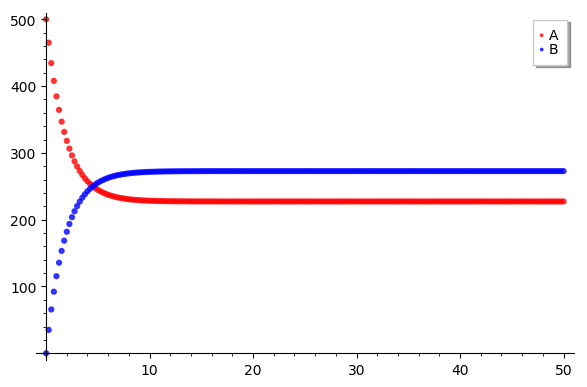

In [39]:

def ODEsys(t,y,params):
    k1,k2 = params
    A,B = y
    return[-k1*A+k2*B,
            k1*A-k2*B]

T=ode_solver()
T.algorithm="rk8pd"
T.function=ODEsys
T.ode_solve(y_0=[500,0],t_span=[0,50],params=[.3,.25],num_points=200)

a=list_plot([(i[0],i[1][0]) for i in T.solution],color='red', pointsize=20, legend_label='A', alpha=.8)
b=list_plot([(i[0],i[1][1]) for i in T.solution],color='blue', pointsize=20, legend_label='B', alpha=.8)
a.legend()
b.legend()
show(a+b)